### Explore and visualize my LinkedIn Network

#### With just over 200 connexions on LinkedIn, i was curious about the statistics of people in my network. So i decided to run this little project to gain insights from my network.

#### To get my data, i didn't perform any web scraping or use API because it was available on LinkedIn in the Data privacy section under settings.

In [1]:
# Import libraries and check the data
import pandas as pd
import numpy as np
import plotly.express as px
import kaleido

In [2]:
# Load the dataset and check the first 10 connections
my_network = pd.read_csv("Connections.csv", skiprows = 3)
my_network.head(10)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Julian,Risch,NaN,deepset,Senior Machine Learning Engineer,07 Mar 2023
1,Ines,Montani,NaN,Explosion,CEO & Founder,01 Mar 2023
2,Asiya,Rahman,NaN,Whisbi,Customer Support Representative,26 Feb 2023
3,Charlie,Collett,NaN,Claremont Consulting,Recruitment Consultant,24 Feb 2023
4,Tom,Aarsen,NaN,Argilla,Machine Learning Engineer,21 Feb 2023
5,Emrick,Nguekeu,NaN,Nexaro,Werkstudent im Bereich Produktmanagement,16 Feb 2023
6,👋 Vincent,Warmerdam,NaN,Explosion,Machine Learning Engineer,16 Feb 2023
7,Mia Hong Nhung,Tran,NaN,Geno Guide GmbH,(Junior) Beraterin für Gesamtbanksteuerung und...,08 Feb 2023
8,Audrick,Nkwakam Fossi,NaN,TELUS International AI Data Solutions,Werkstudent,08 Feb 2023
9,Foday,Sesay,NaN,WACKER,IT-Assistent,07 Feb 2023


In [3]:
my_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     233 non-null    object
 1   Last Name      233 non-null    object
 2   Email Address  3 non-null      object
 3   Company        225 non-null    object
 4   Position       225 non-null    object
 5   Connected On   238 non-null    object
dtypes: object(6)
memory usage: 11.3+ KB


In [4]:
my_network.describe()

,First Name,Last Name,Email Address,Company,Position,Connected On
count,233,233,3,225,225,238
unique,221,233,3,207,198,103
top,Ulrich,Risch,ndacleumaxime@gmail.com,FRisCo Guide GmbH,Werkstudent,05 Feb 2022
freq,3,1,1,5,8,20


In [5]:
# Convert the Connected On column to the datetime format
import datetime

def convert(date):
  return datetime.datetime.strptime(date, "%d %b %Y").strftime("%Y-%m-%d")

my_network["Connected On"] = my_network["Connected On"].apply(convert)

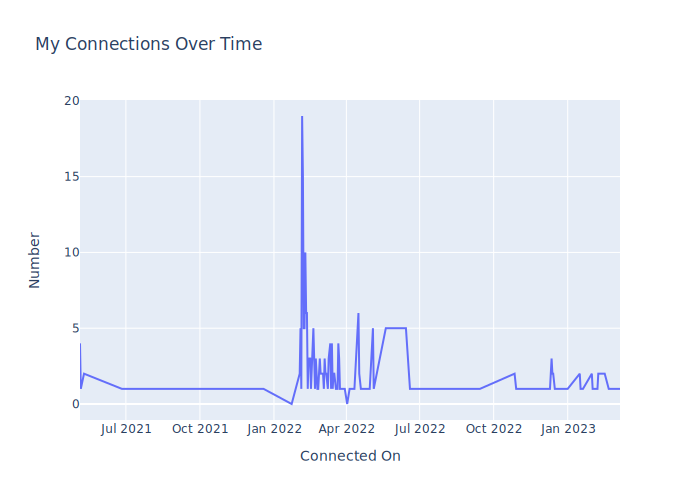

In [6]:
# Visualize the Connected On column with plotly to see my connections over time
connections_line = px.line(my_network.groupby("Connected On").count().reset_index(),
                             x = "Connected On",
                             y = "First Name",
                             labels = {"First Name": "Number"},
                             title = "My Connections Over Time")
  
connections_line.show("svg")

In [7]:
# Group and Count network companies
company_groupby = my_network.groupby("Company").count().reset_index().sort_values("First Name", ascending = False).reset_index(drop = True)
company_groupby

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Geno Guide GmbH,5,5,0,5,5
1,FRisCo Guide GmbH,5,5,0,5,5
2,Capgemini,3,3,0,3,3
3,MEC GROUP,2,2,0,2,2
4,Technische Universität Clausthal,2,2,0,2,2
...,...,...,...,...,...,...
202,Gorillas,1,1,0,1,1
203,Greenhands Agrotech,1,1,0,1,1
204,Groupe PSA,1,1,0,1,1
205,Groupe hospitalier Nord-Essonne,1,1,0,1,1


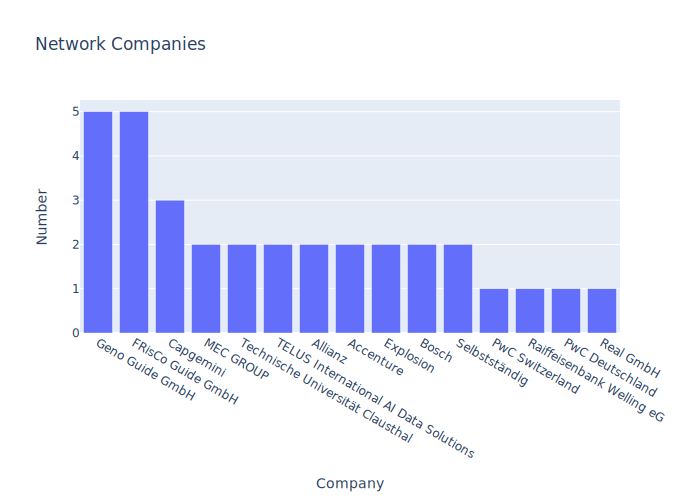

In [8]:
# Visualize the companies where people in my network work
connections_bar = px.bar(company_groupby[:15],
                         x = "Company",
                         y = "First Name",
                         labels = {"First Name": "Number"},
                         title = "Network Companies")

connections_bar.show("svg")

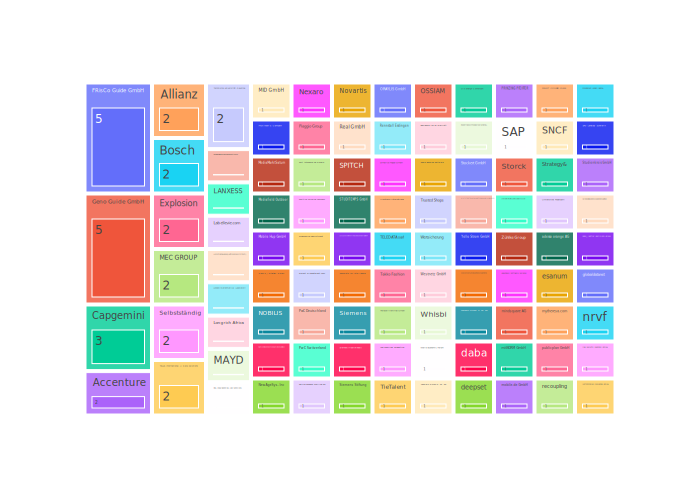

In [9]:
# Try a better visualisation with a treemap
connections_tr = px.treemap(company_groupby[:100], path = ["Company", "Position"],
                            values = "First Name",
                            labels = {"First Name": "Number"})

connections_tr.show("svg")

In [10]:
# Extract position with frequency greater than 0.5%
my_network["Position"].value_counts()[my_network["Position"].value_counts()/len(my_network) * 100 > 0.5]

Werkstudent                  8
Data Analyst                 4
Software Engineer            4
Data Scientist               4
Founder                      3
Consultant                   2
Project Manager              2
Softwareingenieur            2
IT Consultant                2
Werkstudentin                2
Machine Learning Engineer    2
Praktikant                   2
Controller                   2
Geschäftsführer              2
Name: Position, dtype: int64

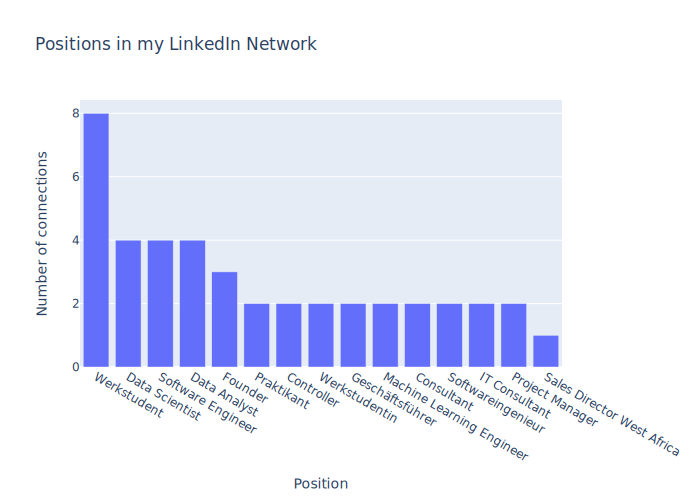

In [11]:
# Display the positions in a bar chart
positions_bar = px.bar(my_network.groupby("Position").count().sort_values("First Name", ascending = False)[:15].reset_index(),
                       x = "Position",
                       y = "First Name",
                       labels = {"First Name": "Number of connections"},
                       title = "Positions in my LinkedIn Network")

positions_bar.show("svg")

In [12]:
# Wordcloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def CreateWordCloud(text):
  wordcloud = WordCloud(width = 800, height = 800,
                        background_color = "black",
                        min_font_size = 10,
                        colormap = "Set2",
                        collocations = False).generate(text)

  fig = plt.figure(figsize = (15, 10), facecolor = None)
  plt.imshow(wordcloud, interpolation = "bilinear")

  plt.show()
  plt.axis("off")
  plt.tight_layout(pad = 0) 

  return fig

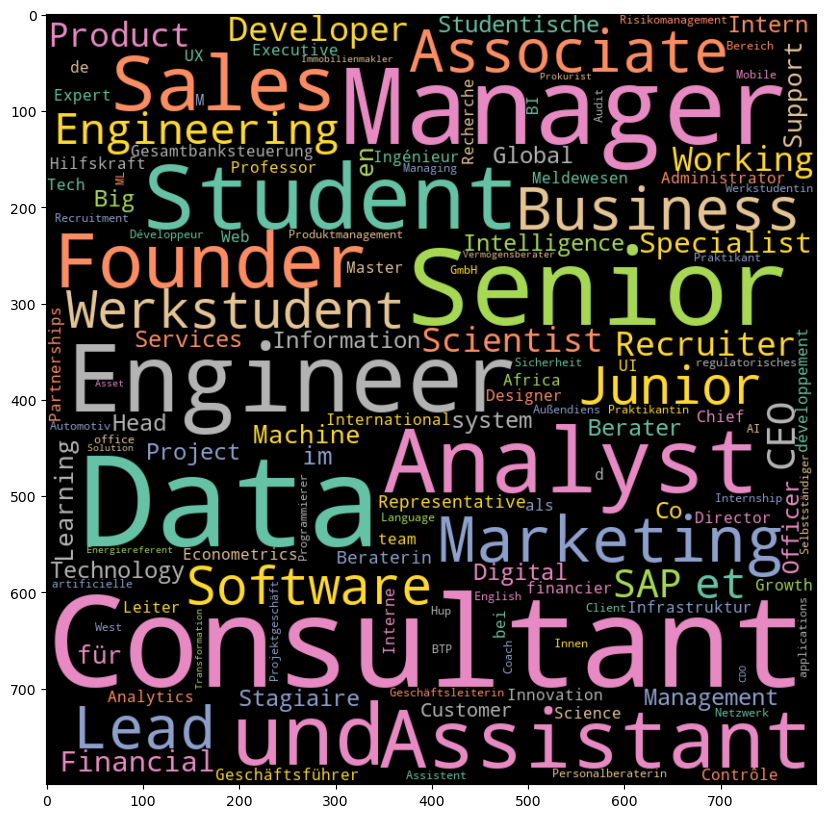

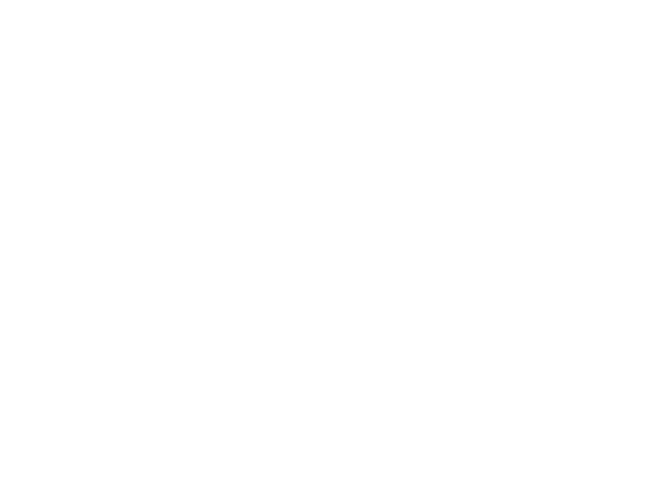

In [13]:
positions = ' '.join(my_network[~my_network.Position.isnull()].Position.unique())
positions_wordcloud = CreateWordCloud(positions)